<a href="https://colab.research.google.com/github/JulianSantos-LATAMAI/ECON-5200/blob/main/%5BLab_3%5D_Visualizing_Development_in_Chile_with_WBGAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Economies: CHL (Chile), HIC (High Income), WLD (World)
country_codes = ['CHL', 'HIC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [24]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Chile for specific calculations
df_chl = df.xs('CHL', axis=1, level=0).copy()

Fetching data...


In [22]:
# Extract Upper Middle Income for specific calculations
df_umc = df.xs('UMC', axis=1, level=0).copy()
df_umc

KeyError: 'HIC'

In [26]:
print("Economy codes present in the DataFrame:")
print(df.columns.get_level_values(0).unique())

Economy codes present in the DataFrame:
Index(['CHL', 'HIC', 'WLD'], dtype='object', name='economy')


In [27]:
print("Economy codes present in the DataFrame:")
print(df.columns.get_level_values(0).unique())

Economy codes present in the DataFrame:
Index(['CHL', 'HIC', 'WLD'], dtype='object', name='economy')


In [28]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Chile for specific calculations
df_chl = df.xs('CHL', axis=1, level=0).copy()


Fetching data...


In [29]:
df_chl

series,Inflation_CPI,Tax_Rev_GDP,Gov_Exp_GDP,Exports_GDP,Gross_Cap_Formation,Imports_GDP,GDP_Const,GDP_Per_Capita_Const,Gross_Dom_Savings,Labor_Part_Rate,Labor_Force_Total,Unemployment_Rate
Year,,,,,,,,,,,,
2000,3.843273,16.072404,12.590926,30.123754,23.750756,28.588169,1.312437e+11,8465.353033,25.286340,55.909,6343733.0,10.491
2001,3.569101,15.913126,12.643098,31.847311,24.091214,30.297456,1.353832e+11,8632.014824,25.641069,55.014,6355065.0,10.390
2002,2.489398,16.073068,12.748594,32.257220,24.108388,30.226632,1.397193e+11,8810.690527,26.138977,54.512,6411103.0,10.168
2003,2.810179,15.768827,12.178188,35.060975,23.399135,30.632445,1.463186e+11,9130.784262,27.827665,55.031,6589050.0,9.765
2004,1.054739,16.423945,11.430210,39.685750,21.243227,30.203611,1.560842e+11,9642.374787,30.725366,55.397,6752634.0,10.162
2005,3.052576,18.120890,10.953631,40.175572,23.267701,31.886962,1.651949e+11,10104.420839,31.556311,55.735,6916575.0,9.340
2006,3.392017,19.612017,10.297115,43.865674,22.186320,29.845961,1.751892e+11,10611.614401,36.206034,56.875,7184183.0,9.024
2007,4.407799,20.379029,10.545955,45.129852,22.348023,31.847173,1.842434e+11,11051.345072,35.630702,57.348,7369317.0,8.427
2008,8.716269,18.709266,11.264929,41.162561,28.896942,39.514065,1.912251e+11,11356.092211,30.545438,58.546,7648250.0,9.285


In [30]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_chl['Natural_Rate_Unemp'] = df_chl['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_chl['Productivity'] = df_chl['GDP_Const'] / df_chl['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_chl['NCO'] = df_chl['Exports_GDP'] - df_chl['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_chl['Budget_Balance'] = df_chl['Tax_Rev_GDP'] - df_chl['Gov_Exp_GDP']

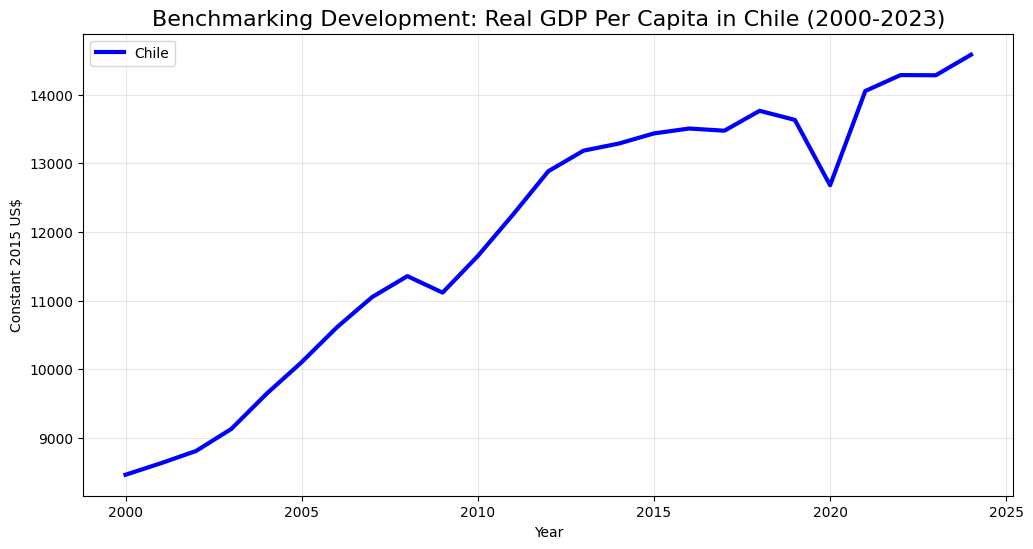

In [31]:
plt.figure(figsize=(12, 6))
# Plot ONLY Chile
plt.plot(df.index, df[('CHL', 'GDP_Per_Capita_Const')], label='Chile', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita in Chile (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

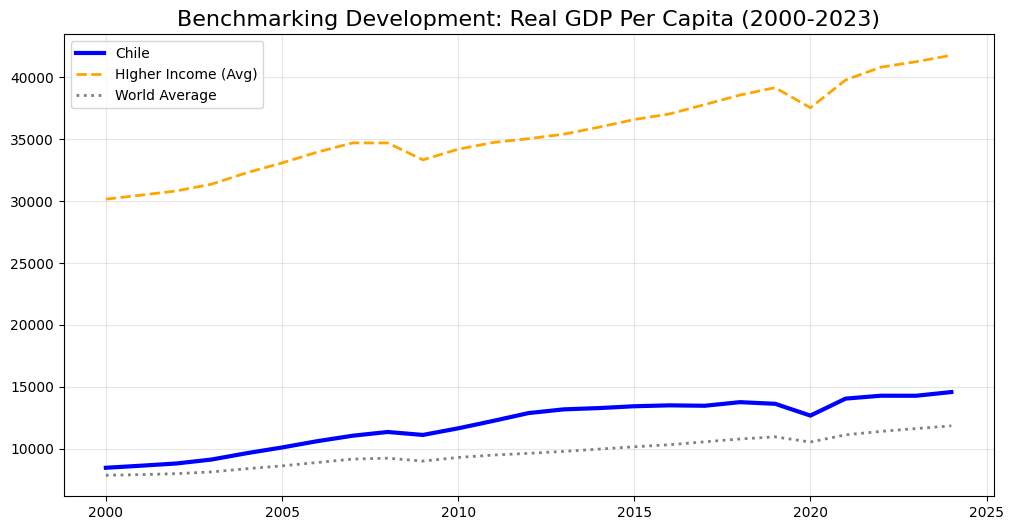

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('CHL', 'GDP_Per_Capita_Const')], label='Chile', color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('HIC', 'GDP_Per_Capita_Const')], label='HIgher Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)


plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

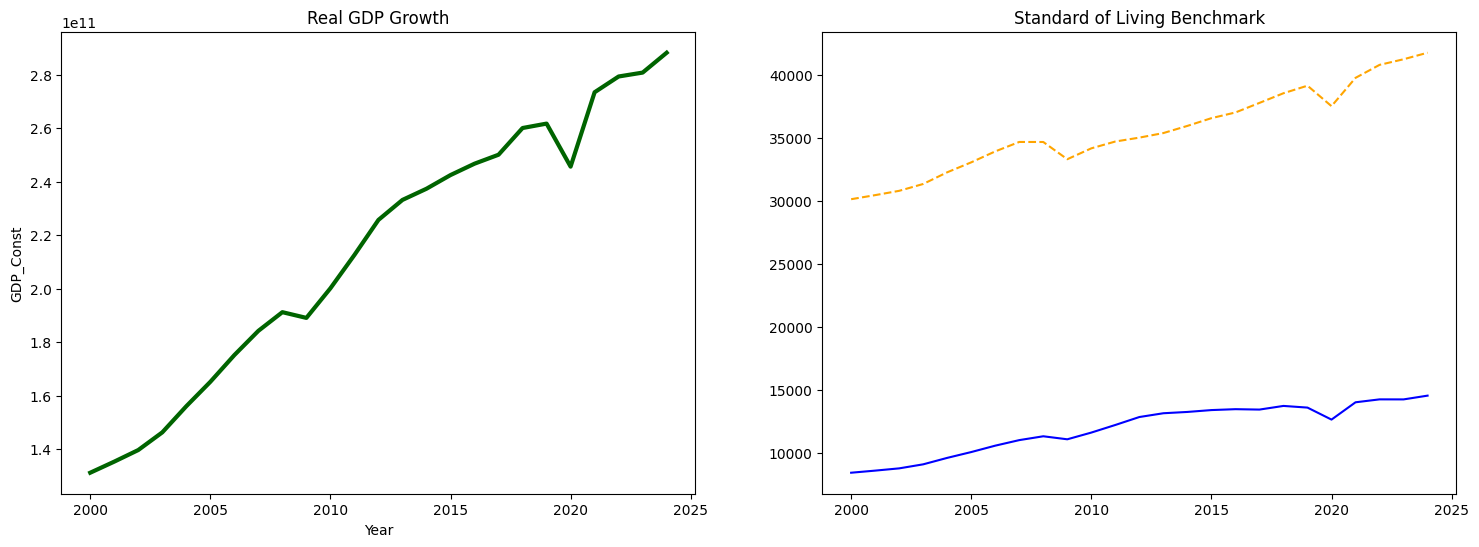

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_chl, x=df_chl.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('CHL', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('HIC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

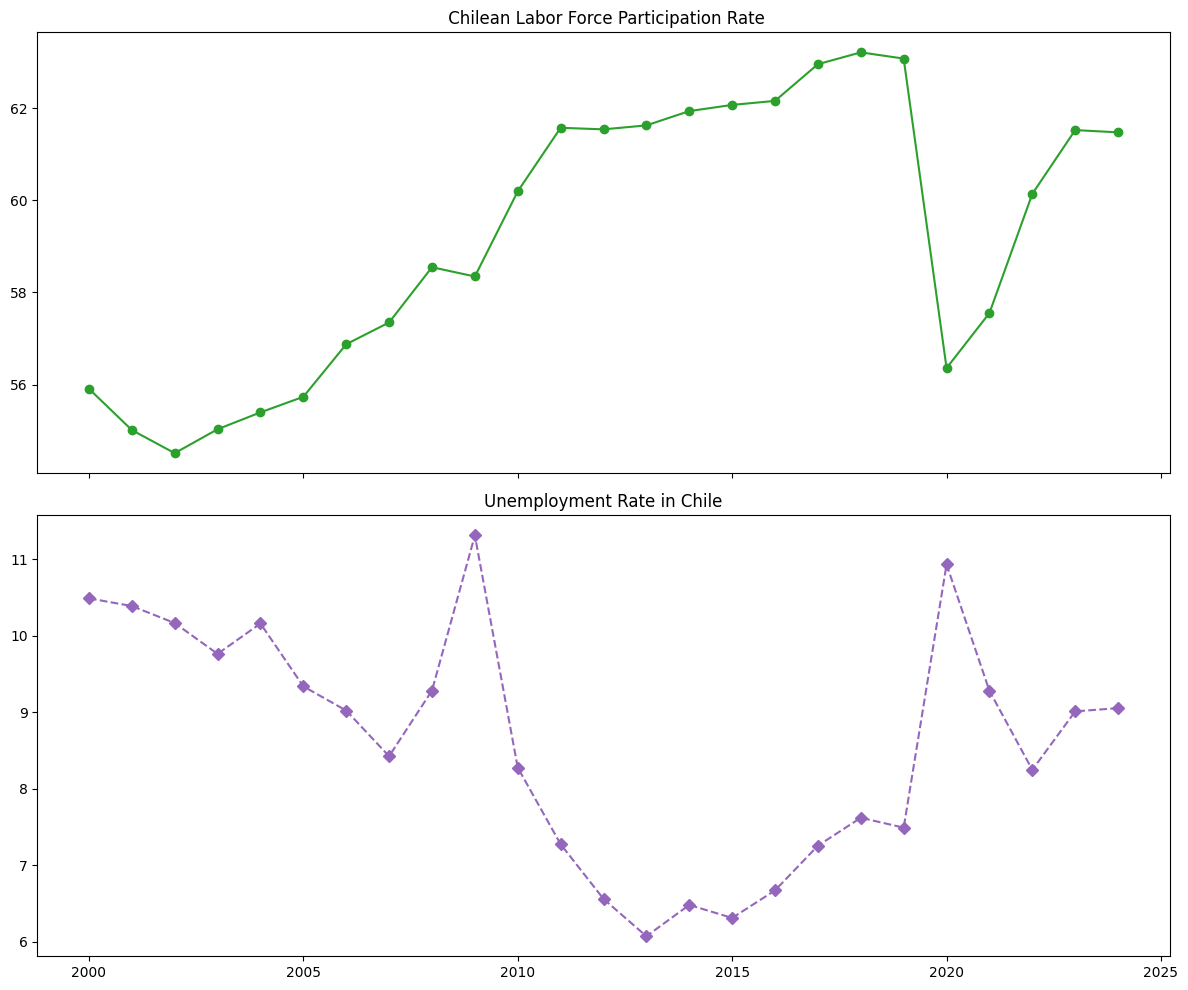

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_chl.index, df_chl['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title(' Chilean Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_chl.index, df_chl['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate in Chile')
plt.tight_layout()
plt.show()

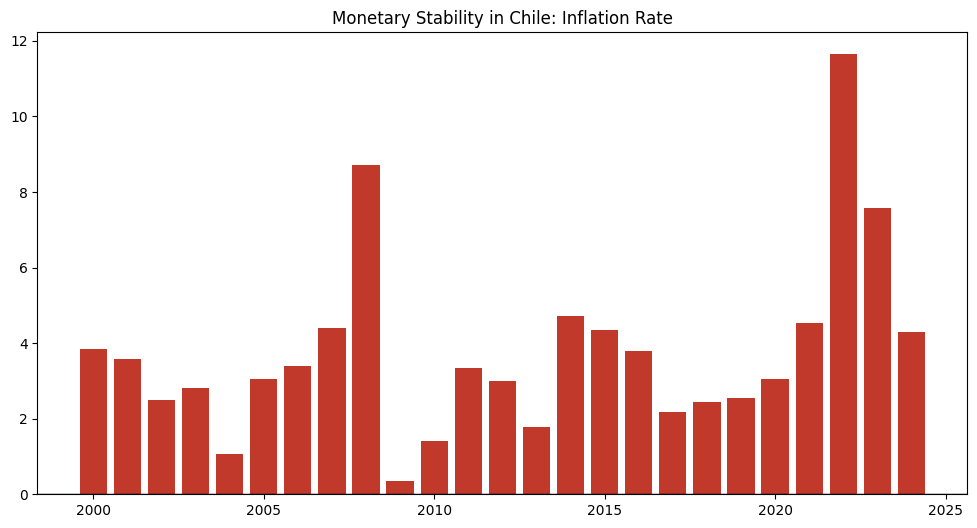

In [40]:
plt.figure(figsize=(12, 6))

plt.bar(df_chl.index, df_chl['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability in Chile: Inflation Rate')
plt.show()

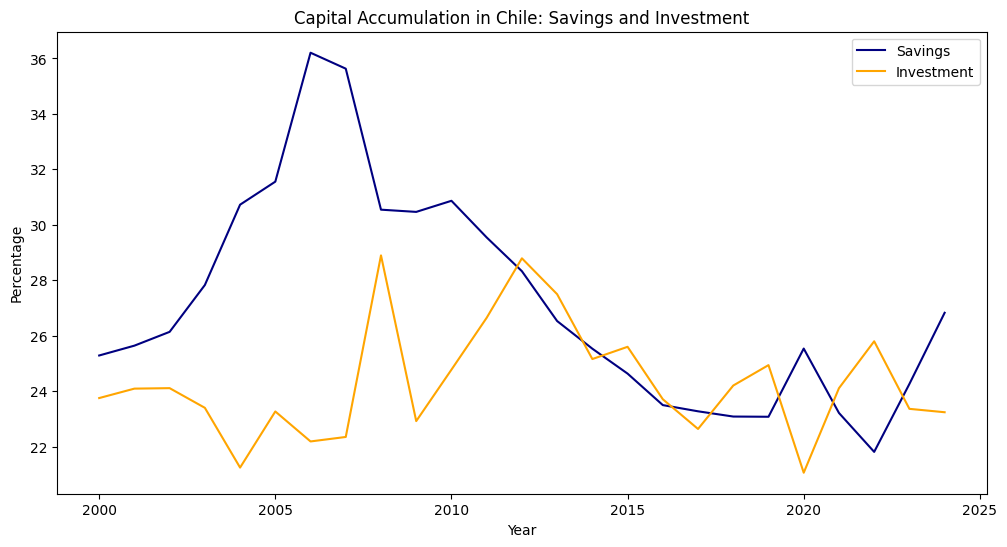

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(df_chl.index, df_chl ['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_chl.index, df_chl ['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation in Chile: Savings and Investment')
plt.xlabel('Year')
plt.ylabel ('Percentage')
plt.legend()
plt.show()

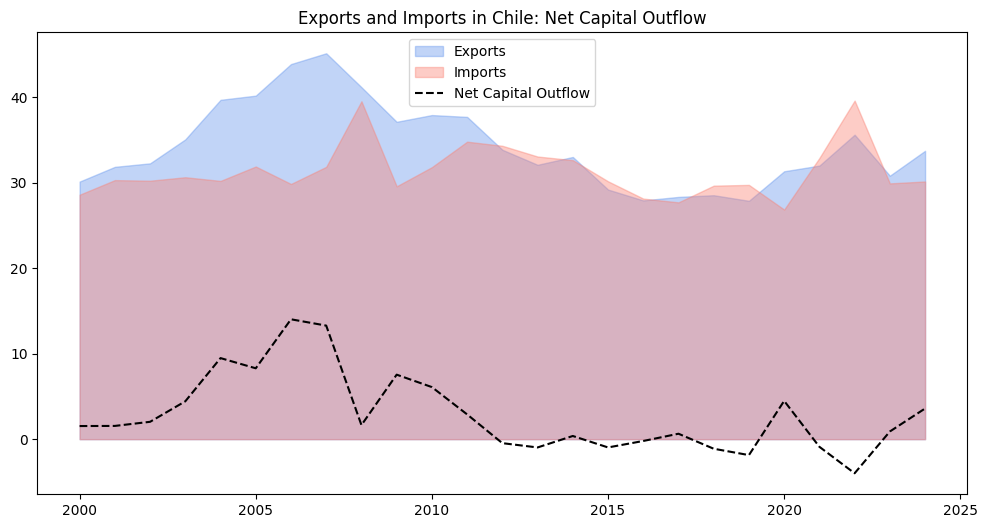

In [47]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_chl.index, df_chl['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_chl.index, df_chl['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_chl.index, df_chl['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.title('Exports and Imports in Chile: Net Capital Outflow')
plt.legend()
plt.show()


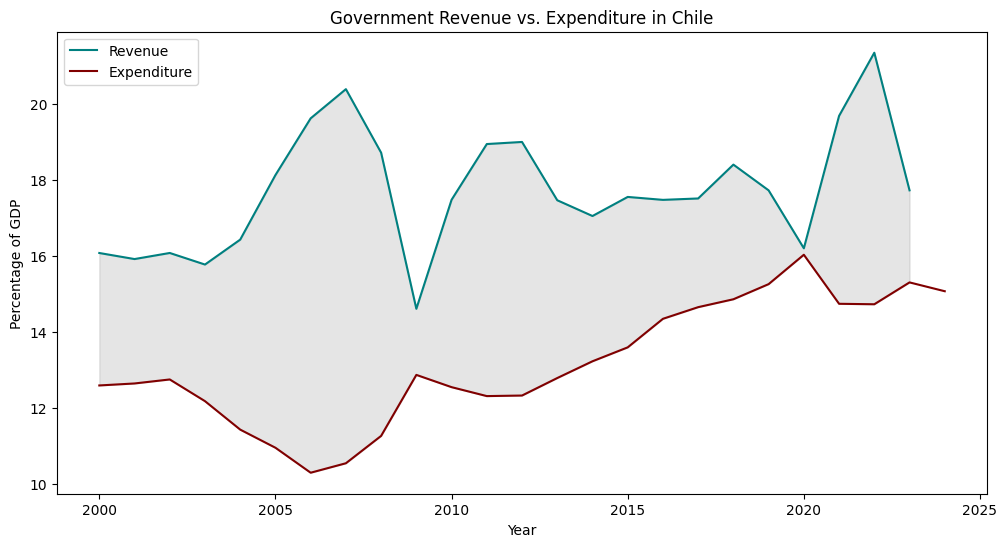

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(df_chl.index, df_chl['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_chl.index, df_chl['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_chl.index, df_chl['Tax_Rev_GDP'], df_chl['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.title('Government Revenue vs. Expenditure in Chile')
plt.xlabel('Year')
plt.ylabel('Percentage of GDP')
plt.legend()
plt.show()

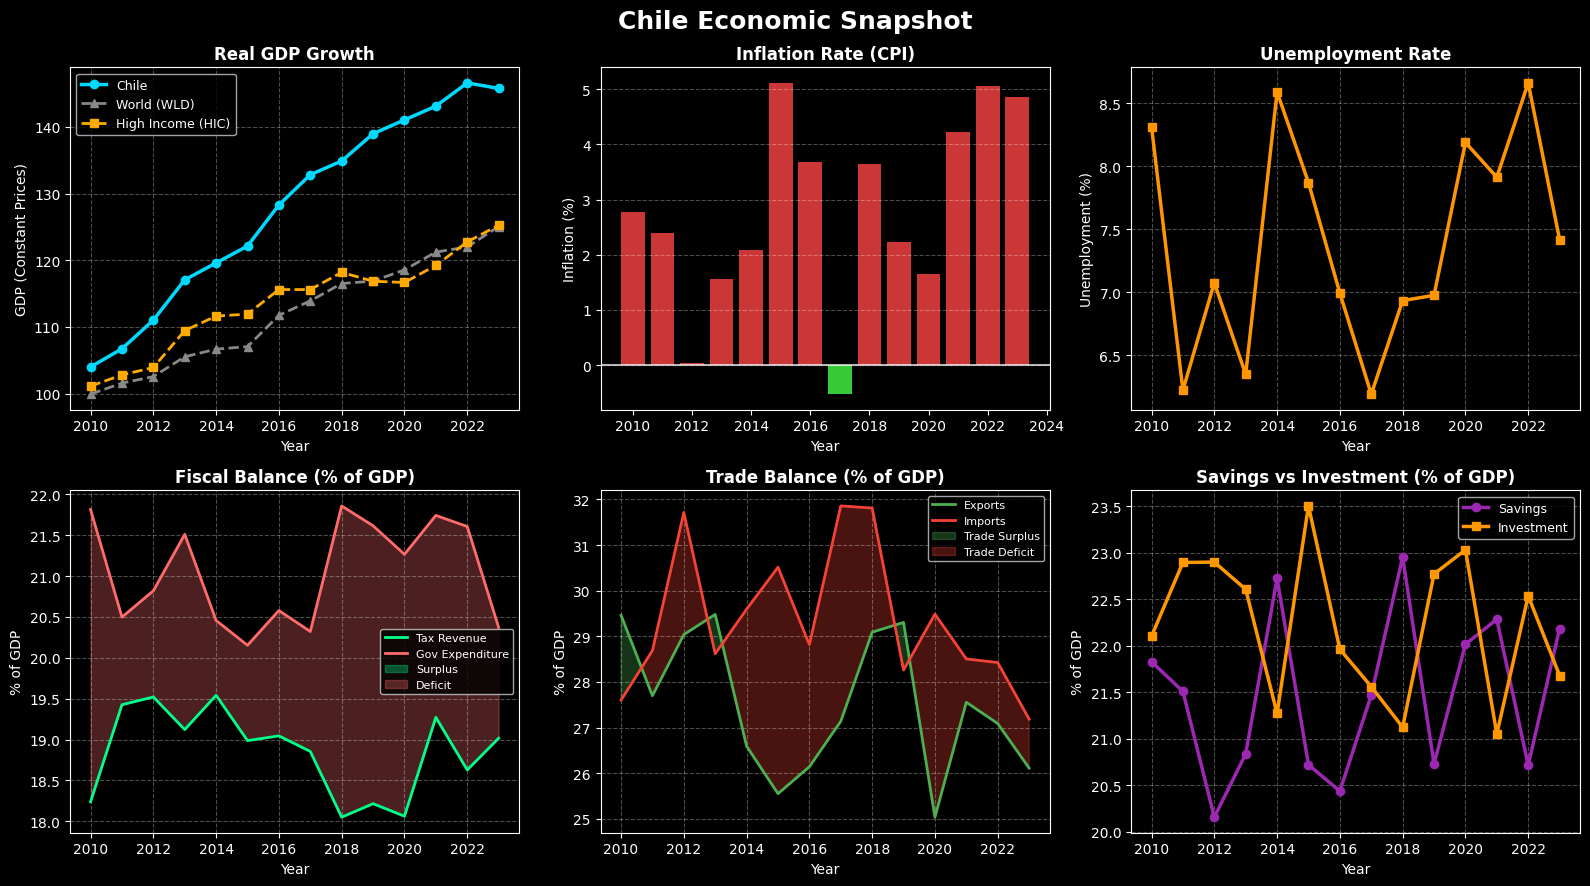

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set the dark background style
plt.style.use('dark_background')

# Create sample data (replace this with your actual df_chl DataFrame)
# Assuming data from 2010-2023
years = np.arange(2010, 2024)
np.random.seed(42)

df_chl = pd.DataFrame({
    'Year': years,
    'GDP_Const': np.cumsum(np.random.randn(len(years)) * 2 + 3) + 100,
    'GDP_Const_WLD': np.cumsum(np.random.randn(len(years)) * 1.5 + 2.5) + 100,
    'GDP_Const_HIC': np.cumsum(np.random.randn(len(years)) * 1.8 + 2.2) + 100,
    'Inflation_CPI': np.random.randn(len(years)) * 2 + 3,
    'Unemployment_Rate': np.random.rand(len(years)) * 3 + 6,
    'Tax_Rev_GDP': np.random.rand(len(years)) * 2 + 18,
    'Gov_Exp_GDP': np.random.rand(len(years)) * 2 + 20,
    'Exports_GDP': np.random.rand(len(years)) * 5 + 25,
    'Imports_GDP': np.random.rand(len(years)) * 5 + 27,
    'Gross_Dom_Savings': np.random.rand(len(years)) * 3 + 20,
    'Gross_Cap_Formation': np.random.rand(len(years)) * 3 + 21
})

# Create figure with 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
fig.suptitle('Chile Economic Snapshot', fontsize=18, fontweight='bold', y=0.98)

# 1. Top Left: Real GDP (Line chart with benchmarks)
axes[0, 0].plot(df_chl['Year'], df_chl['GDP_Const'], color='#00d9ff', linewidth=2.5, marker='o', label='Chile')
axes[0, 0].plot(df_chl['Year'], df_chl['GDP_Const_WLD'], color='#888888', linewidth=2, linestyle='--', marker='^', label='World (WLD)')
axes[0, 0].plot(df_chl['Year'], df_chl['GDP_Const_HIC'], color='#ffaa00', linewidth=2, linestyle='--', marker='s', label='High Income (HIC)')
axes[0, 0].set_title('Real GDP Growth', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('GDP (Constant Prices)')
axes[0, 0].legend(loc='best', fontsize=9)
axes[0, 0].grid(True, alpha=0.3, linestyle='--')

# 2. Top Middle: Inflation Rate (Bar chart with horizontal line at 0)
colors = ['#ff4444' if x > 0 else '#44ff44' for x in df_chl['Inflation_CPI']]
axes[0, 1].bar(df_chl['Year'], df_chl['Inflation_CPI'], color=colors, alpha=0.8)
axes[0, 1].axhline(y=0, color='white', linestyle='-', linewidth=1.5, alpha=0.7)
axes[0, 1].set_title('Inflation Rate (CPI)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Inflation (%)')
axes[0, 1].grid(True, alpha=0.3, linestyle='--', axis='y')

# 3. Top Right: Unemployment Rate (Line chart)
axes[0, 2].plot(df_chl['Year'], df_chl['Unemployment_Rate'], color='#ff9500', linewidth=2.5, marker='s')
axes[0, 2].set_title('Unemployment Rate', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Year')
axes[0, 2].set_ylabel('Unemployment (%)')
axes[0, 2].grid(True, alpha=0.3, linestyle='--')

# 4. Bottom Left: Fiscal Balance (Fill area between Tax Revenue and Gov Expenditure)
axes[1, 0].plot(df_chl['Year'], df_chl['Tax_Rev_GDP'], color='#00ff88', linewidth=2, label='Tax Revenue')
axes[1, 0].plot(df_chl['Year'], df_chl['Gov_Exp_GDP'], color='#ff6b6b', linewidth=2, label='Gov Expenditure')
axes[1, 0].fill_between(df_chl['Year'], df_chl['Tax_Rev_GDP'], df_chl['Gov_Exp_GDP'],
                         where=(df_chl['Tax_Rev_GDP'] >= df_chl['Gov_Exp_GDP']),
                         color='#00ff88', alpha=0.3, interpolate=True, label='Surplus')
axes[1, 0].fill_between(df_chl['Year'], df_chl['Tax_Rev_GDP'], df_chl['Gov_Exp_GDP'],
                         where=(df_chl['Tax_Rev_GDP'] < df_chl['Gov_Exp_GDP']),
                         color='#ff6b6b', alpha=0.3, interpolate=True, label='Deficit')
axes[1, 0].set_title('Fiscal Balance (% of GDP)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('% of GDP')
axes[1, 0].legend(loc='best', fontsize=8)
axes[1, 0].grid(True, alpha=0.3, linestyle='--')

# 5. Bottom Middle: Trade Balance (Fill area between Exports and Imports)
axes[1, 1].plot(df_chl['Year'], df_chl['Exports_GDP'], color='#4CAF50', linewidth=2, label='Exports')
axes[1, 1].plot(df_chl['Year'], df_chl['Imports_GDP'], color='#f44336', linewidth=2, label='Imports')
axes[1, 1].fill_between(df_chl['Year'], df_chl['Exports_GDP'], df_chl['Imports_GDP'],
                         where=(df_chl['Exports_GDP'] >= df_chl['Imports_GDP']),
                         color='#4CAF50', alpha=0.3, interpolate=True, label='Trade Surplus')
axes[1, 1].fill_between(df_chl['Year'], df_chl['Exports_GDP'], df_chl['Imports_GDP'],
                         where=(df_chl['Exports_GDP'] < df_chl['Imports_GDP']),
                         color='#f44336', alpha=0.3, interpolate=True, label='Trade Deficit')
axes[1, 1].set_title('Trade Balance (% of GDP)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('% of GDP')
axes[1, 1].legend(loc='best', fontsize=8)
axes[1, 1].grid(True, alpha=0.3, linestyle='--')

# 6. Bottom Right: Savings vs Investment (Dual lines)
axes[1, 2].plot(df_chl['Year'], df_chl['Gross_Dom_Savings'], color='#9C27B0', linewidth=2.5, marker='o', label='Savings')
axes[1, 2].plot(df_chl['Year'], df_chl['Gross_Cap_Formation'], color='#FF9800', linewidth=2.5, marker='s', label='Investment')
axes[1, 2].set_title('Savings vs Investment (% of GDP)', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Year')
axes[1, 2].set_ylabel('% of GDP')
axes[1, 2].legend(loc='best', fontsize=9)
axes[1, 2].grid(True, alpha=0.3, linestyle='--')

# Apply tight layout to prevent overlap
plt.tight_layout()
plt.show()